## Predicting Employee Churn with Python

Employees are the crucial part of any company/organization. The employee churn is very expensive to the business in terms of time and money. The cost of replacing them can be large. Hence, retaining the current employees is vital. Now, with all the data we acquire, we can predict the employee attrition. 

In this project, we are using a sample HR data to answer the following questions:
    1. What factors are contributing more to employee attrition?
    2. What type of measures should the company take in order to retain their employees?
    3. The probability of predicting an active employee leaving the company

## 1. Importing the Libraries
We will import other libraries at a later stage if required

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import matplotlib as matplot
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
import plotly.graph_objs as go #Visualization
import plotly.offline as py # visualization

## 2. Importing the Data

In [2]:
df=pd.read_csv('HR_DATA.csv')

In [3]:
df.head() # Quick look at the first few rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


#### Below are the features of our dataset

    satisfaction_level (0–1)
    
    last_evaluation (Time since last evaluation in years)
    
    number_projects (Number of projects completed while at work)
    
    average_monthly_hours (Average monthly hours at workplace)
    
    time_spend_company (Time spent at the company in years)
    
    Work_accident (Whether the employee had a workplace accident)
    
    left (Whether the employee left the workplace or not (1 or 0)) - This is our target variable
    
    promotion_last_5 years (Whether the employee was promoted in the last five years)
    
    Department (Department in which they work for)
    
    salary (Relative level of salary)

In [4]:
df.dtypes # Finding out the data types of all Features

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
Departments               object
salary                    object
left                       int64
dtype: object

We have four categorical variables:
    1. Departments
    2. salary
    3. promotion_last_5years
    4. Work_accident
    
We have five numerical variables:
    1. satisfaction_level
    2. last_evaluation
    3. number_project
    4. average_monthly_hours
    5. time_spend_company
    
Our target variable - employee churn (left) is also categorical variable with two outcomes - 1 and 0

## 3. Exploratory Data Analysis

Here we try to understand the statistical properties of the features and how it varies with respect to the "left" feature

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.isnull().any() # Looking for NULL/NaN values, we would eliminate null values by replacing them with mean or rejecting the records with null values

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
promotion_last_5years    False
Departments              False
salary                   False
left                     False
dtype: bool

In [7]:
left = df.groupby('left') # "left" is the churn feature/variable. We're looking at other features with respect with employee churn
left.mean()

C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\3868735835.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [8]:
df.shape # Total Rows and Columns

(14999, 10)

Our dataset has 14,999 employees with 10 features

In [28]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

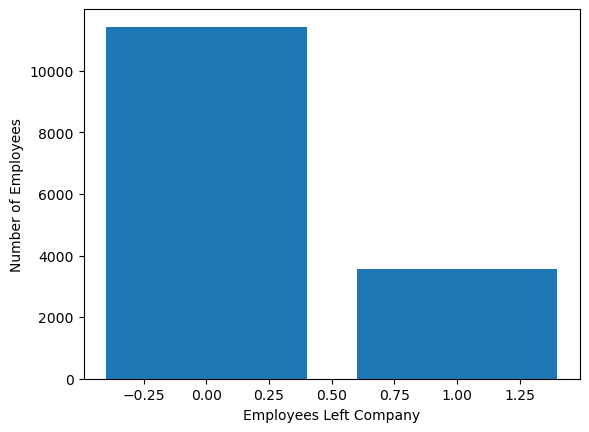

In [29]:
left_count=df.groupby('left').count()
pyplt.bar(left_count.index.values, left_count['satisfaction_level'])
pyplt.xlabel('Employees Left Company')
pyplt.ylabel('Number of Employees')
pyplt.show()

In our dataset, we have 11,428 active employees and 3,571 churned employees

In [36]:
# This is to create a pie chart representing the percentage of churned and non churned employees
lab = ['Non Churned','Churned'] # To get the labels
val = df['left'].value_counts().tolist() # To get the counts

trace = go.Pie(labels =  lab,
               values = val ,
               marker = dict(colors =  [ 'lightgreen' ,'orange'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value",
               hole = 0.5
              )
layout = go.Layout(dict(title = "Employee Attrition in Data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

fig = go.Figure(data = trace,layout = layout)
py.iplot(fig)

#### Correlation Matrix:
In this section, we are trying to understand the correlation between different features. This tells us the association between two variables. We need to avoid features which are highly correlated with each other because of redundancy and model bias towards those variables

In [11]:
#correlation

correlation = df.corr()

matrix_cols = correlation.columns.tolist() # Creating labels

corr_array  = np.array(correlation) #convert to array

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\4152058952.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



From the above heatmap, we can see that none of our features have high correlation with each other so, we don't have to eliminate any redundant feature.

#### Creating sub-data frame by Segregating Churned and non churned employees to compare all the features with respect to these sub data frames 

In [12]:
churn     = df[df["left"] == 1] # Selecting only Churned employees
not_churn = df[df["left"] == 0] # Selecting only non Churned employees

# Separating catagorical and numerical Features
target_col = ["left"]
cat_cols = ['Departments ','salary','promotion_last_5years','Work_accident']
num_cols = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours','time_spend_company']


#### Visualizing the data with respect to employee attrition

In [13]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    rotation = 90,
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Employees",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    rotation = 90,
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn Employees" 
                   )


    layout = go.Layout(dict(title = column + " distribution in employees attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Employees",
                                                font = dict(size = 12),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non Churn Employees",
                                                font = dict(size = 12),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Employees",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn Employees",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in employees attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
  

##### Plotting the categorical variables

In [14]:
plot_pie('salary')

In [15]:
plot_pie('promotion_last_5years')

In [16]:
plot_pie('Work_accident')

In [17]:
histogram('Departments ')

##### Plotting the numerical variables

C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\192525046.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\192525046.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\192525046.py:4: UserWarning:



`distpl

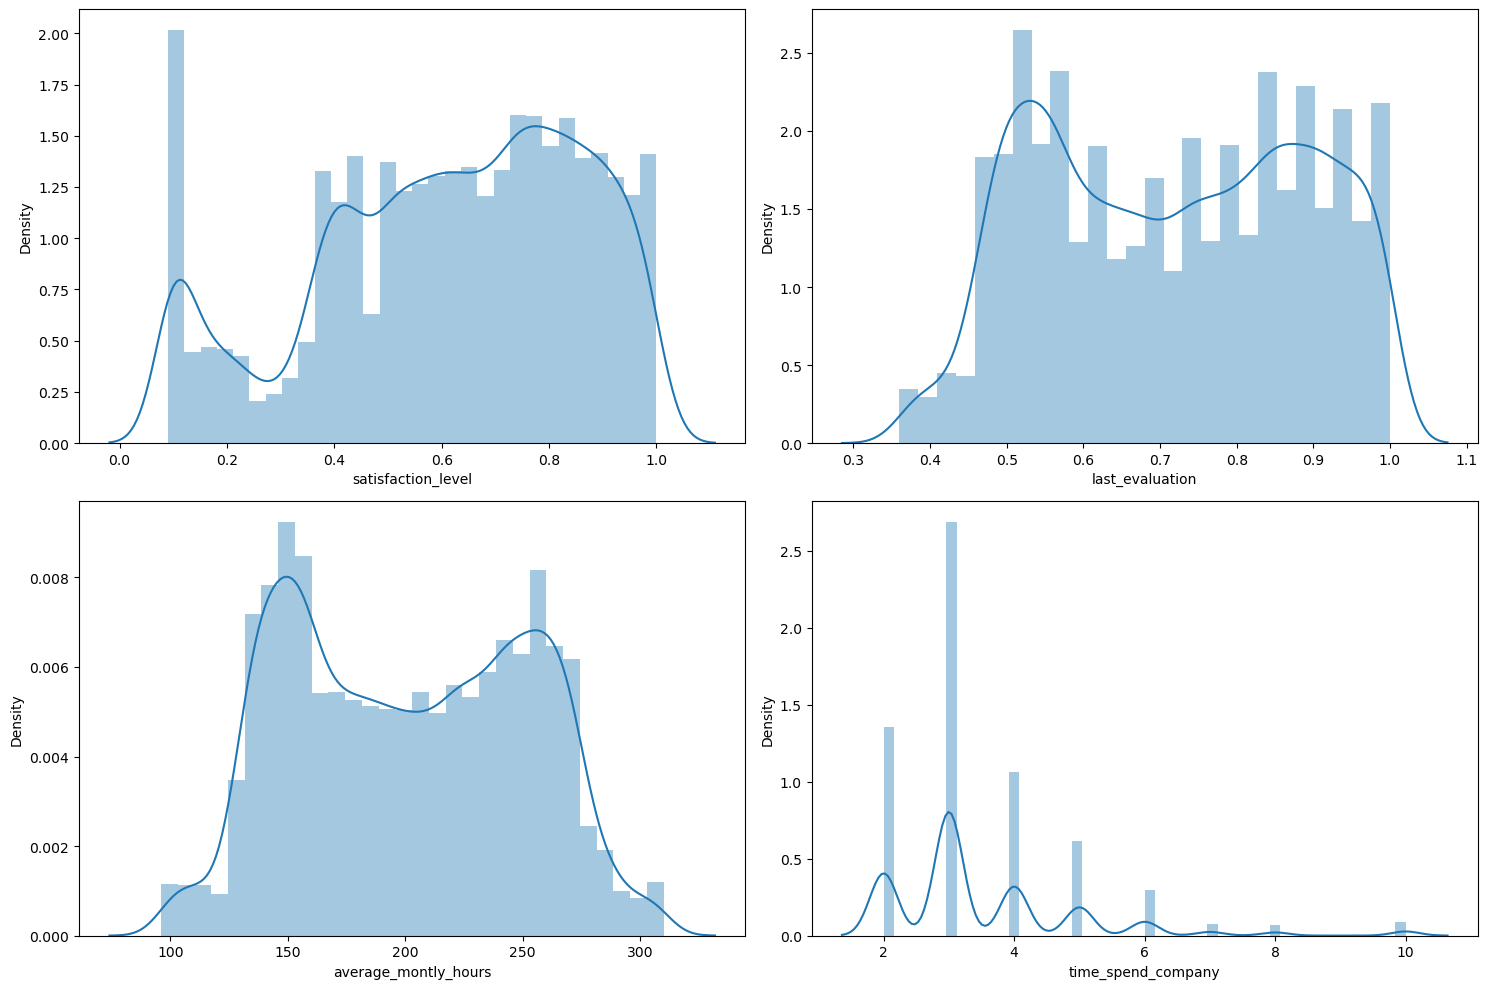

In [37]:
fig,ax = pyplt.subplots(2,2, figsize=(15,10))                
sns.distplot(df['satisfaction_level'], ax = ax[0,0]) 
sns.distplot(df['last_evaluation'], ax = ax[0,1]) 
sns.distplot(df['average_montly_hours'], ax = ax[1,0]) 
sns.distplot(df['time_spend_company'], ax = ax[1,1]) 
pyplt.tight_layout()
pyplt.show()

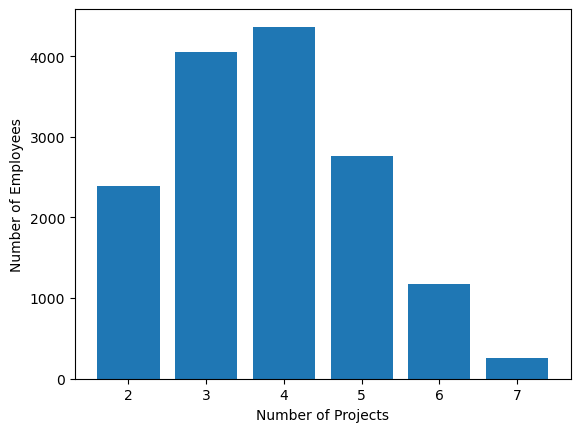

In [38]:
num_projects=df.groupby('number_project').count()
pyplt.bar(num_projects.index.values, num_projects['satisfaction_level'])
pyplt.xlabel('Number of Projects')
pyplt.ylabel('Number of Employees')
pyplt.show()

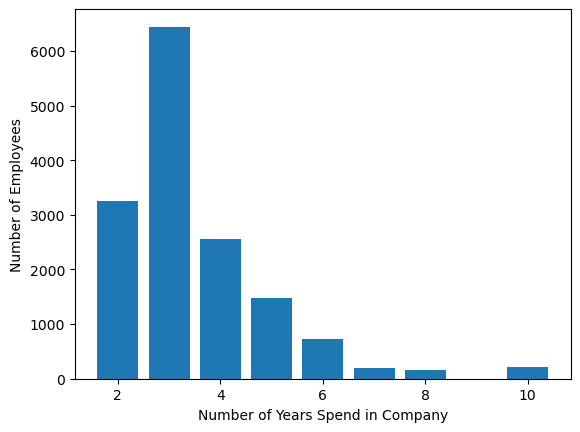

In [39]:
time_spent=df.groupby('time_spend_company').count()
pyplt.bar(time_spent.index.values, time_spent['satisfaction_level'])
pyplt.xlabel('Number of Years Spend in Company')
pyplt.ylabel('Number of Employees')
pyplt.show()

C:\Users\knsaagar\AppData\Local\Temp\ipykernel_19832\628102865.py:4: MatplotlibDeprecationWarning:

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



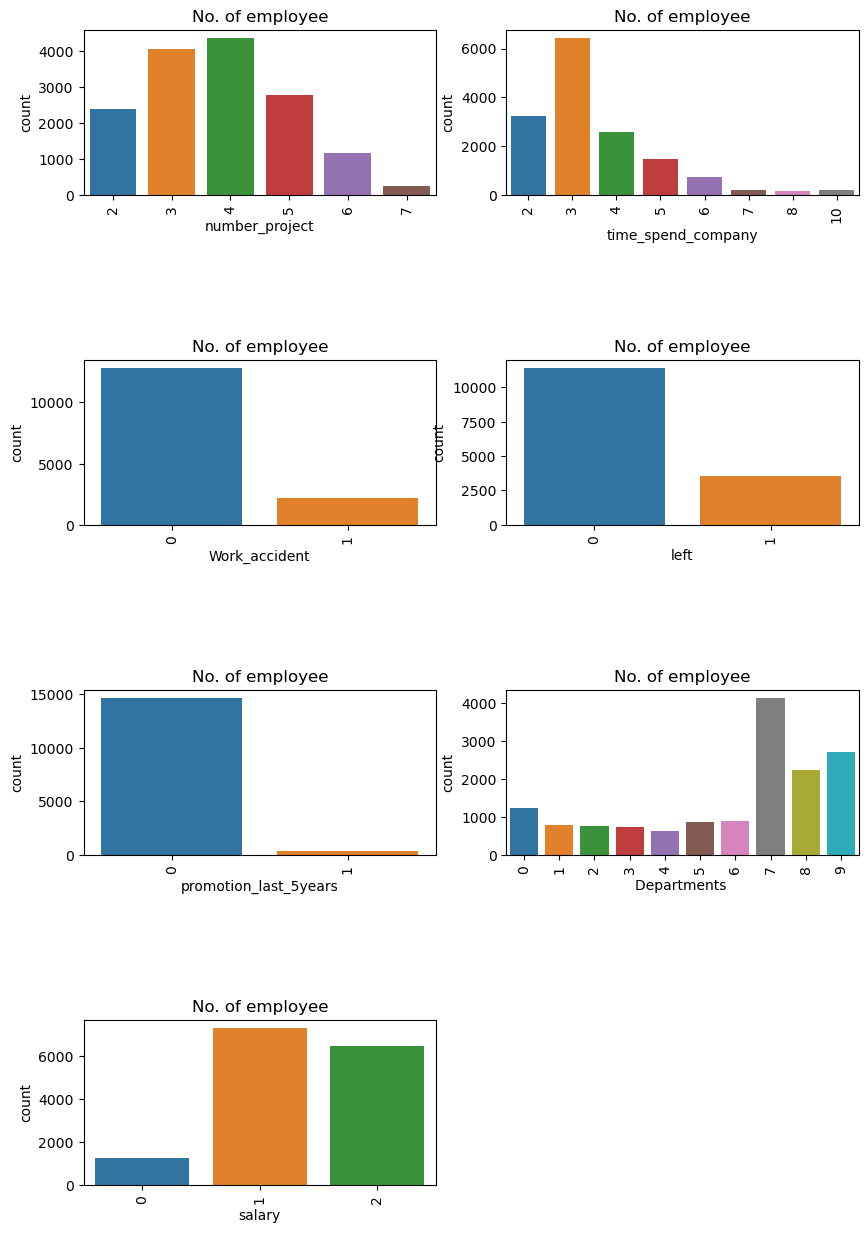

In [40]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=pyplt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    pyplt.subplot(4, 2, i+1)
    pyplt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    pyplt.xticks(rotation=90)
    pyplt.title("No. of employee")

In [19]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  df[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

C:\Users\knsaagar\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



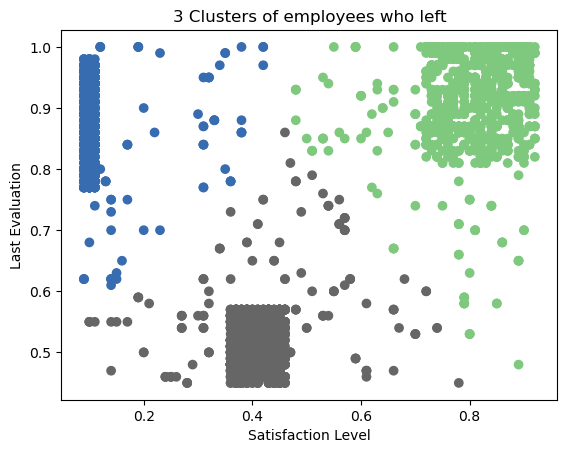

In [20]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
pyplt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
pyplt.xlabel('Satisfaction Level')
pyplt.ylabel('Last Evaluation')
pyplt.title('3 Clusters of employees who left')
pyplt.show()

In [21]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['Departments ']=le.fit_transform(df['Departments '])

In [22]:
#Spliting data into predictor and target variables
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary']]
y=df['left']

In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [24]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

In [25]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9715555555555555
Precision: 0.958252427184466
Recall: 0.9207089552238806


In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Text(0.5, 427.9555555555555, 'Predicted label')

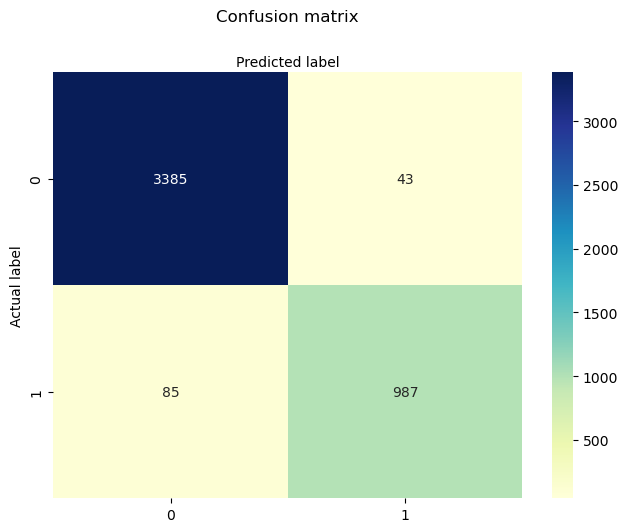

In [27]:
## Confusion Matrix
conf_matrix = confusion_matrix(y_test,y_pred)

class_names=[0,1] # name  of classes
fig, ax = pyplt.subplots()
tick_marks = np.arange(len(class_names))
pyplt.xticks(tick_marks, class_names)
pyplt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
pyplt.tight_layout()
pyplt.title('Confusion matrix', y=1.1)
pyplt.ylabel('Actual label')
pyplt.xlabel('Predicted label')